<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Sesion_18_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-Aprendizaje supervisado
-Aprendizaje no supervisado
-Aprendizaje por refuerzo
-Self-learning

# Aprendizaje no supervisado

Algunos tipos de datos, puede que incluso la gran mayoria, no van a estár etiquetados. Para este tipo de datos se han creado estrategias de aprendizaje que se reunen en el término de aprendizaje no supervisado. Se puede por ejemplo emplear aprendizaje no supervisado para:
- Reducción de dimensionalidad (PCA)
- Representation Learning (clustering)
- Detección de anomalias (VAE)

## K - means clustering
Fuente para mas detalles: curso cs229 stanford

### Objetivo
Agrupar los datos de entrenamiento en clusters que agrupen los datos mas similares entre ellos bajo una métrica dada. 

### Overview: Iteraciones del algoritmo para k=2.
![Iteraciones del algoritmo para k=2.](imagenes/kmeans.png "Iteraciones")

### Algoritmo
1. Inicializar k centroides (por ejemplo aleatorios).

2. Asignar cada punto al centroide más cercano.

3. Actualizar cada centroide calculando el promedio de los puntos asignados.

4. Repetir pasos 2–3 hasta que los centroides no cambien o se alcance el límite de iteraciones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load and prepare data
housing = fetch_california_housing()
X = housing.data  
print(X.shape)
X = StandardScaler().fit_transform(X)

(20640, 8)


In [3]:
# Find optimal k with elbow method
# Inertias: sum of squared distances (total)
inertias = []
k_range = range(2, 9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    print(f"k={k}: Inertia={kmeans.inertia_:.0f}")

k=2: Inertia=129613
k=3: Inertia=118310
k=4: Inertia=110812
k=5: Inertia=92066
k=6: Inertia=83783
k=7: Inertia=78299
k=8: Inertia=71769


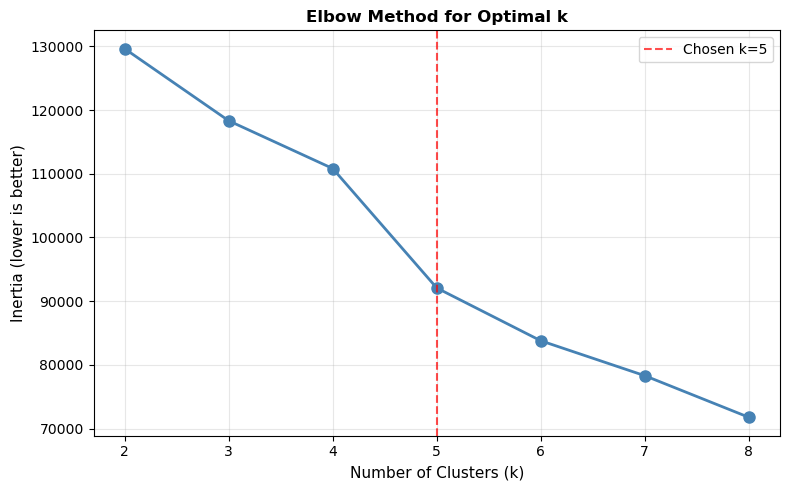

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'o-', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Number of Clusters (k)', fontsize=11)
plt.ylabel('Inertia (lower is better)', fontsize=11)
plt.title('Elbow Method for Optimal k', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Chosen k=5')
plt.legend()
plt.tight_layout()

Look for 'elbow' where inertia drops less sharply
Optimal k ≈ 5 (good balance of segments vs complexity)


In [5]:
#Clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

print(f"   Created 5 market segments")
print(f"   Cluster sizes: ", end="")
for i in range(5):
    print(f"{(labels==i).sum():,}", end="  ")
print()

   Created 5 market segments
   Cluster sizes: 7,915  3,960  4,786  78  3,901  


In [6]:
#Visualize with PCA: Using PCA to visualize 8D clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
var_explained = pca.explained_variance_ratio_.sum()
print(f"   PCA captures {var_explained:.1%} of variance")

   PCA captures 48.9% of variance


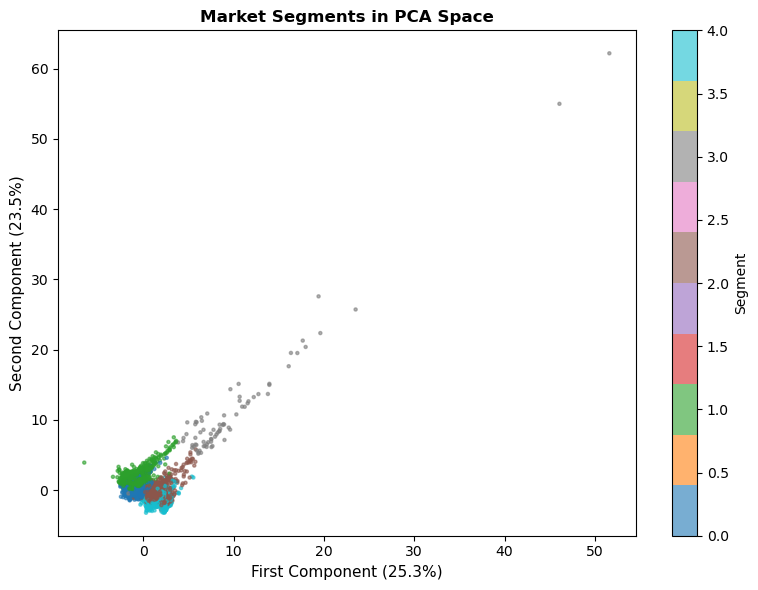

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, 
                      cmap='tab10', s=5, alpha=0.6)
plt.xlabel(f'First Component ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
plt.ylabel(f'Second Component ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
plt.title('Market Segments in PCA Space', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Segment')
plt.tight_layout()

# Ejercicio en clase

Realizar una clusterizacion de datos sinteticos con dos tipos de data sets

- Make blobs (aumente la complejidad de estos)
- Make moons (para ver los limites del algoritmo)

### USE K-MEANS WHEN:
- Clusters are roughly spherical/globular
- You can define k reasonably
- Features are on similar scales (or standardized)
- Example: Market segmentation, customer grouping

### AVOID K-MEANS WHEN:
- Clusters have complex curved shapes
- Clusters have very different sizes/densities
- Hierarchical structure matters
- Example: Pattern recognition, anomaly detection

### ALTERNATIVES TO CONSIDER:
-DBSCAN: Handles arbitrary shapes, finds outliers


### Note: 
n_init‘auto’ or int, default=’auto’

    Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).

    When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like.

# Variational autoencoder 

## Overview
1. EM ALGORITHM:
- Iteratively maximizes log-likelihood for latent variable models
- E-step: Compute posterior p(z|x; θ)
- M-step: Maximize expected complete-data log-likelihood
- K-Means is a special case with hard assignments

2. VARIATIONAL AUTOENCODER:
https://en.wikipedia.org/wiki/Variational_autoencoder#/media/File:VAE_Basic.png

- Uses neural networks for encoder q_φ(z|x) and decoder p_θ(x|z)
- Maximizes ELBO (similar to EM, but amortized inference)
- Loss = Reconstruction + KL divergence

3. CONNECTION EM ↔ VAE:
- EM: Exact posterior per data point (expensive!)
- VAE: Approximate posterior with shared parameters (efficient!)
   
4. ANOMALY DETECTION:
- VAE learns normal data distribution
- Anomalies have high reconstruction error
- Simple and effective for unsupervised anomaly detection



Ejemplo de implementacion, pseudo-codigo

https://medium.com/data-science/hands-on-anomaly-detection-with-variational-autoencoders-d4044672acd5